# Insert Title Here
**DATA102 S11 Group 3*
- Banzon, Beatrice Elaine B.
- Buitre, Cameron
- Marcelo, Andrea Jean C.
- Navarro, Alyssa Riantha R.
- Vicente, Francheska Josefa

# **Requirements and Imports**
Before starting, the relevant libraries and files in building and training the model should be loaded into the notebook first.

## **Basic** Libraries
* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [1]:
import numpy as np
import pandas as pd
import datasets

In [2]:
import matplotlib.pyplot as plt

## **`Natural Language Processing`** Libraries
* `train_test_split` is a function that allows the dataset to be split into two randomly.
* `TFidfVectorizer` converts the given text documents into a matrix, which has TF-IDF features
* `CountVectorizer` converts the given text documents into a matrix, which has the counts of the tokens

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## **`Machine Learning`** Libraries
The following classes are models that implement different methods of clustering.
- `KMeans`

In [4]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

On the other hand, these classes computes and visualizes the different scores about how well a model works.
* `f1_score` computes the balanced F-score by comparing the actual classes and the predicted classes
* `hamming_loss` computes the fraction of labels that were incorrectly labeled by the model
* `accuracy_score` computes the accuracy by determining how many classes were correctly predicted
* `precision_recall_fscore_support`computes the precision, recall, F-measure and support per class
* `ConfusionMatrixDisplay` allows the visualization of the computed confusion matrix
* `confusion_matrix`  is a function that displays the number of samples that are correctly and incorrectly labeled by the model, by grouping them into four groups (i.e., True Positives, False Positives, True Negatives, False Negatives)

In [5]:
from sklearn.metrics import f1_score, roc_auc_score, hamming_loss, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

Meanwhile, `GridSearchCV` is a cross-validation class that allows the exhaustive search over all possible combinations of hyperparameter values

In [7]:
from sklearn.model_selection import GridSearchCV

Last, `pickle` is a module that can serialize and deserialize objects. In this notebook, it is used to save and load models.

In [8]:
import pickle

### Datasets and Files
To train the models that utilizes the traditional machine learning algorithms, the dataset that was cleaned will be loaded using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [9]:
df = pd.read_csv ('cleaned_data.csv')
df

,label,text
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
23130,0,The winner of the special election in Cavite t...
23131,0,The remains of four people inside the Cessna p...
23132,0,A Kabataan Party-list representative visited t...
23133,0,The Philippine Coast Guard is expected to have...


In [10]:
def make_dataframe (df):
    true_df = df [df ['label'] == 1][['text', 'label']]
    false_df = df [df ['label'] == 0][['text', 'label']]
    
    num_of_true = len(true_df)
    
    false_df = false_df.sample(n = num_of_true)
    false_df = false_df.reset_index(drop=True)
    
    df = false_df.append(true_df, ignore_index = True)
    df = shuffle(df.reset_index(drop=True)).reset_index(drop=True)
    
    return df

# **Feature Engineering**

As we cannot directly feed the text data as input to the machine learning models, we have to convert it into the format that they can understand—numbers. Before doing that, since we want to save the models and vectorizers that we will be using, we will first need to define the values and functions to do so, starting with the folder where we will be saving it. 

In [11]:
main_directory = './saved_models/Clustering/vectorizers/'

Next, we will be creating a function that will be saving the vectorizer to the specified path.

In [12]:
def save_vectorizers (vectorizer, vectorizer_name):
    vectorizer_filename = main_directory + vectorizer_name + '.pkl'
    
    with open(vectorizer_filename, 'wb') as file:
        pickle.dump(vectorizer, file)

## Splitting the Dataset into **`Train`**, **`Validation`**, and **`Test`** Split
Let us first define the **X** (input) and **y** (target/output) of our model. This is done to allow the stratifying of the data when it is split into the train, val and test.

The **X** (input) can be retrieved by getting the `text` column in the original dataset.

In [13]:
X = df ['text']
X

0        Ayon sa TheWrap.com, naghain ng kaso si Krupa,...
1        Kilala rin ang singer sa pagkumpas ng kanyang ...
2        BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...
3        Kasama sa programa ang pananalangin, bulaklak ...
4        Linisin ang Friendship Department dahil dadala...
                               ...                        
23130    The winner of the special election in Cavite t...
23131    The remains of four people inside the Cessna p...
23132    A Kabataan Party-list representative visited t...
23133    The Philippine Coast Guard is expected to have...
23134    National Bureau of Investigation-National Capi...
Name: text, Length: 23135, dtype: object

In [14]:
y = df ['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
23130    0
23131    0
23132    0
23133    0
23134    0
Name: label, Length: 23135, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42, 
                                                    shuffle = True)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.1,
                                                  stratify = y_train,
                                                  random_state = 42, 
                                                  shuffle = True)

In [17]:
train_df = pd.concat([X_train, y_train], axis = 1).reset_index(drop = True)
train_df

,text,label
0,Kahit nagluwag na noong Pebrero sa COVID-19 re...,0
1,Former Interior Undersecretary Jonathan Malaya...,0
2,Saker Message: No current Saker messages. Russ...,1
3,Japan’s Lost Black Hole Satellite Took This LA...,1
4,Home › SCIENCE & TECHNOLOGY › MOBILE PASSES DE...,1
...,...,...
16652,"TRUTH: No Apartheid in Israel, Says Black Sout...",1
16653,"Mark Warner, Virginia Ron Wyden, Oregon In b...",1
16654,WASHINGTON -- President Barack Obama joined ne...,0
16655,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",0


In [18]:
train_df = make_dataframe (train_df)
train_df

C:\Users\admin\AppData\Local\Temp\ipykernel_14772\1097446513.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = false_df.append(true_df, ignore_index = True)


,text,label
0,November supermoon biggest in nearly 70 years ...,1
1,A 46-year-old woman died on the spot after she...,0
2,(Before It's News) As advanced as our Job Pos...,1
3,The Criminal Investigation Detection Group (CI...,0
4,The Office of the Ombudsman placed National Ir...,0
...,...,...
6591,Officials from the Philippines and China met o...,0
6592,We barely know anything about the suspect in t...,0
6593,"Fisherfolk, farmers, children, and individuals...",0
6594,"""Suntakan na lang, tanggalin mo ito (posas)."" ...",1


In [19]:
X_train = train_df ['text']
y_train = train_df ['label']

In [20]:
val_df = pd.concat([X_val, y_val], axis = 1).reset_index(drop = True)
val_df

,text,label
0,"LABUAN BAJO — President Ferdinand ""Bongbong"" M...",0
1,"CorbettReport.com November 8, 2016 In Dougla...",1
2,WASHINGTON - The United States scrambled F-16 ...,0
3,Miami (CNN) There were few softballs Wednesday...,0
4,Trump and Sanders get all the attention for th...,0
...,...,...
1846,"The owner of a convenience store in Malvar, Ba...",0
1847,While the full field of Republican presidentia...,0
1848,WASHINGTON - US President Joe Biden called on ...,0
1849,Baltimore leaders say the first night of the c...,0


In [21]:
test_df = pd.concat([X_test, y_test], axis = 1).reset_index(drop = True)
test_df

,text,label
0,"OTTAWA, Canada - Canada's government struck a ...",0
1,Editor’s note: This press release is sponsored...,0
2,(CNN) Donald Trump and Bernie Sanders are conf...,0
3,The Alliance of Concerned Teachers (ACT) calle...,0
4,Manila's City Engineering Office has received ...,0
...,...,...
4622,The House Committee on Human Rights has approv...,0
4623,The Metro Rail Transit Line 3 (MRT-3) has impl...,0
4624,"October 28, 2016 at 9:00 PM Why would Putin ...",1
4625,PHNOM PENH — An eleven-year-old girl in Cambod...,0


In [22]:
print('Train')
print('Input  shape: ', X_train.shape)
print('Output shape: ', y_train.shape, '\n')

print('Val')
print('Input  shape: ', X_val.shape)
print('Output shape: ', y_val.shape, '\n')

print('Test')
print('Input  shape: ', X_test.shape)
print('Output shape: ', y_test.shape, '\n') 

Train
Input  shape:  (6596,)
Output shape:  (6596,) 

Val
Input  shape:  (1851,)
Output shape:  (1851,) 

Test
Input  shape:  (4627,)
Output shape:  (4627,) 



In [23]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 5000)

In [24]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))

In [25]:
save_vectorizers(tfidf_vectorizer, 'tfidf')

In [26]:
tfidf_val = tfidf_vectorizer.transform(X_val.values.astype('U'))

In [27]:
tfidf_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [28]:
count_vectorizer = CountVectorizer(stop_words = 'english', max_features = 5000)

In [29]:
count_train = count_vectorizer.fit_transform(X_train.values.astype('U'))
save_vectorizers(count_vectorizer, 'count')

In [30]:
count_val = count_vectorizer.transform(X_val.values.astype('U'))

In [31]:
count_test = count_vectorizer.transform(X_test.values.astype('U'))

In [32]:
def convert_to_label (prediction, labels_per_cluster):
    return labels_per_cluster [prediction]

In [33]:
labels_per_cluster = {}

In [34]:
def scores (y_true, y_pred):
    accuracy = accuracy_score(y_true = y_true, y_pred = y_pred)   
    f1_micro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'micro')
    f1_macro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'macro')
    hamming_loss_score = hamming_loss(y_true = y_true, y_pred = y_pred)
    # precision, recall, _, _ = precision_recall_fscore_support(y_true, y_pred)
    precision, recall, _, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
    return accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall

In [35]:
def format_scores (k, y_true, y_pred):
    accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_true, y_pred)
    
    return {
        'K' : k,
        'Accuracy' : accuracy,
        'F1 Micro Average' : f1_micro_average,
        'F1 Macro Average' : f1_macro_average,
        'Hamming Loss' : hamming_loss_score,
        'Precision' : precision,
        # 'Precision (True)' : precision [1],
        'Recall' : recall,
        # 'Recall (True)' : recall [1],
    }

In [36]:
tfidf_val_scores = []

In [37]:
tfidf_models = []
tfidf_labels_per_cluster = []

In [92]:
def cluster_categorize_predict (k, orig_df, df_set, km, model, vectorizer):
    predictions = km.predict (df_set)
    converted_df = pd.DataFrame(df_set.toarray(), columns = vectorizer.get_feature_names_out())
    
    labeled_df = orig_df.copy() 
    labeled_df ['predictions'] = predictions 
    
    temp_x = pd.concat ([converted_df, labeled_df ['predictions']], axis = 1)
    
    predictions = model.predict (temp_x.values)
    
    dict_scores = format_scores (k, labeled_df ['label'], val_predictions)
    
    return dict_scores

In [93]:
def cluster_then_categorize_news (k, train_set, val_set, model, vectorizer):
    label_per_cluster = {}
    
    km = KMeans (n_clusters = k, random_state = 42)
    km.fit (train_set)
    train_predictions = km.predict (train_set)
    converted_train = pd.DataFrame(train_set.toarray(), columns = vectorizer.get_feature_names_out())
    
    train_labeled_df = train_df.copy() 
    train_labeled_df ['predictions'] = train_predictions
    
    temp_x_train = pd.concat ([converted_train, train_labeled_df ['predictions']], axis = 1)

    model.fit (temp_x_train.values, y_train)

    dict_scores = cluster_categorize_predict (k, val_df, val_set, km, model, vectorizer)
        
    return dict_scores, km, model

In [38]:
def cluster_news (k, train_set, val_set):
    label_per_cluster = {}
    
    km = KMeans (n_clusters = k, random_state = 42)
    km.fit (train_set)
    train_predictions = km.predict (train_set)
    train_labeled_df = train_df.copy() 
    train_labeled_df ['predictions'] = train_predictions

    for i in range (k + 1):
        dominant_label = train_labeled_df.groupby ('predictions')[['label']].value_counts().index [i][1]
        label_per_cluster [i] = dominant_label
    
    train_labeled_df ['predictions'] = train_labeled_df ['predictions'].replace(labels_per_cluster)

    dict_scores = format_scores (k, train_labeled_df ['label'], train_labeled_df ['predictions'])

    val_predictions = km.predict (val_set)
    val_labeled_df = val_df.copy() 
    val_labeled_df ['predictions'] = val_predictions 
    val_labeled_df ['predictions'] = val_labeled_df ['predictions'].replace(labels_per_cluster)

    dict_scores = format_scores (k, val_labeled_df ['label'], val_labeled_df ['predictions'])
        
    return dict_scores, km, label_per_cluster

In [39]:
for k in range (1, 60):
    val_score, model, label = cluster_news (k, tfidf_train, tfidf_val)
    tfidf_val_scores.append (val_score)
    tfidf_models.append (model)
    tfidf_labels_per_cluster.append (label)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_km

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
scores_df = pd.DataFrame (tfidf_val_scores)
scores_df.sort_values ('Recall', ascending = False)

,K,Accuracy,F1 Micro Average,F1 Macro Average,Hamming Loss,Precision,Recall
0,1,0.802269,0.802269,0.445144,0.197731,0.643636,0.802269
4,5,0.378714,0.378714,0.174058,0.621286,0.857841,0.378714
3,4,0.324689,0.324689,0.190609,0.675311,0.666631,0.324689
8,9,0.301999,0.301999,0.082664,0.698001,0.850206,0.301999
1,2,0.298757,0.298757,0.297837,0.701243,0.608258,0.298757
9,10,0.243112,0.243112,0.048093,0.756888,0.816293,0.243112
6,7,0.238250,0.238250,0.081714,0.761750,0.833642,0.238250
10,11,0.215559,0.215559,0.057951,0.784441,0.907869,0.215559
20,21,0.203674,0.203674,0.026857,0.796326,0.863773,0.203674
7,8,0.151810,0.151810,0.054770,0.848190,0.722303,0.151810


In [41]:
val_predictions = tfidf_models [1].predict (tfidf_val)
val_labeled_df = val_df.copy() 
val_labeled_df ['predictions'] = val_predictions 
val_labeled_df ['predictions'] = val_labeled_df ['predictions'].replace(tfidf_labels_per_cluster [1])

In [42]:
dict_scores = format_scores (2, val_labeled_df ['label'], val_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.7012425715829281,
 'F1 Micro Average': 0.7012425715829281,
 'F1 Macro Average': 0.5586961311008378,
 'Hamming Loss': 0.29875742841707187,
 'Precision': 0.7209540805621565,
 'Recall': 0.7012425715829281}

In [43]:
test_predictions = tfidf_models [1].predict (tfidf_test)
test_labeled_df = test_df.copy() 
test_labeled_df ['predictions'] = test_predictions 
test_labeled_df ['predictions'] = test_labeled_df ['predictions'].replace(tfidf_labels_per_cluster [1])

In [44]:
dict_scores = format_scores (2, test_labeled_df ['label'], test_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.6993732440025935,
 'F1 Micro Average': 0.6993732440025935,
 'F1 Macro Average': 0.5552428956519281,
 'Hamming Loss': 0.3006267559974065,
 'Precision': 0.7184162880321272,
 'Recall': 0.6993732440025935}

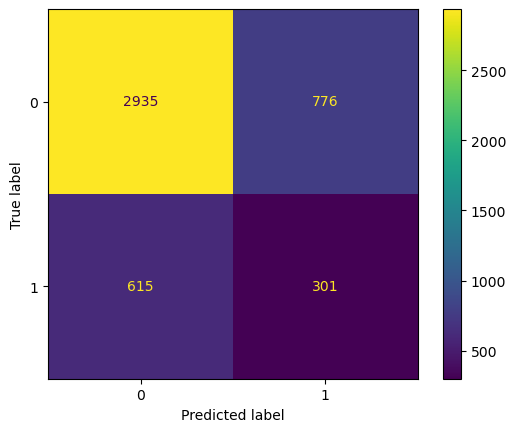

In [45]:
ConfusionMatrixDisplay(confusion_matrix(test_labeled_df ['label'], test_labeled_df ['predictions'])).plot()

In [46]:
count_val_scores = []
count_models = []
count_labels_per_cluster = []

In [47]:
for k in range (1, 60):
    val_score, model, label = cluster_news (k, count_train, count_val)
    count_val_scores.append (val_score)
    count_models.append (model)
    count_labels_per_cluster.append (label)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_km

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:

In [48]:
scores_df = pd.DataFrame (count_val_scores)
scores_df.sort_values ('Recall', ascending = False)

,K,Accuracy,F1 Micro Average,F1 Macro Average,Hamming Loss,Precision,Recall
0,1,0.802269,0.802269,0.445144,0.197731,0.643636,0.802269
1,2,0.718531,0.718531,0.562240,0.281469,0.722266,0.718531
3,4,0.678012,0.678012,0.367040,0.321988,0.728120,0.678012
10,11,0.588871,0.588871,0.151680,0.411129,0.726549,0.588871
9,10,0.573204,0.573204,0.136907,0.426796,0.717389,0.573204
30,31,0.320367,0.320367,0.038904,0.679633,0.700796,0.320367
17,18,0.243112,0.243112,0.061993,0.756888,0.842545,0.243112
6,7,0.172880,0.172880,0.079071,0.827120,0.606959,0.172880
20,21,0.139384,0.139384,0.024917,0.860616,0.794527,0.139384
12,13,0.121556,0.121556,0.039764,0.878444,0.653498,0.121556


In [49]:
val_predictions = count_models [1].predict (count_val)
val_labeled_df = val_df.copy() 
val_labeled_df ['predictions'] = val_predictions 
val_labeled_df ['predictions'] = val_labeled_df ['predictions'].replace(count_val_scores [1])

In [50]:
dict_scores = format_scores (2, val_labeled_df ['label'], val_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.7185305240410589,
 'F1 Micro Average': 0.7185305240410589,
 'F1 Macro Average': 0.5622395271826833,
 'Hamming Loss': 0.2814694759589411,
 'Precision': 0.7222663991485183,
 'Recall': 0.7185305240410589}

In [51]:
test_predictions = count_models [1].predict (count_test)
test_labeled_df = test_df.copy() 
test_labeled_df ['predictions'] = test_predictions 
test_labeled_df ['predictions'] = test_labeled_df ['predictions'].replace(count_labels_per_cluster [1])

In [52]:
dict_scores = format_scores (2, test_labeled_df ['label'], test_labeled_df ['predictions'])
dict_scores

{'K': 2,
 'Accuracy': 0.7279014480224768,
 'F1 Micro Average': 0.7279014480224768,
 'F1 Macro Average': 0.5656434064829965,
 'Hamming Loss': 0.27209855197752325,
 'Precision': 0.7241807889524337,
 'Recall': 0.7279014480224768}

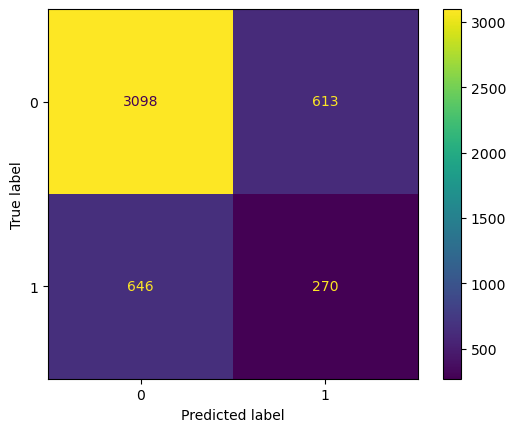

In [53]:
ConfusionMatrixDisplay(confusion_matrix(test_labeled_df ['label'], test_labeled_df ['predictions'])).plot()

In [94]:
tfidf_logreg_models = []
tfidf_logreg_km_models = []
tfidf_logreg_scores = []

In [95]:
for k in range (1, 60):
    logreg_model = LogisticRegression ()
    val_score, km, model = cluster_then_categorize_news (k, count_train, count_val, logreg_model, tfidf_vectorizer)
    tfidf_logreg_scores.append (val_score)
    tfidf_logreg_models.append (model)
    tfidf_logreg_km_models.append (km)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

In [96]:
tfidf_logreg_scores

[{'K': 1,
  'Accuracy': 0.7185305240410589,
  'F1 Micro Average': 0.7185305240410589,
  'F1 Macro Average': 0.5622395271826833,
  'Hamming Loss': 0.2814694759589411,
  'Precision': 0.7222663991485183,
  'Recall': 0.7185305240410589},
 {'K': 2,
  'Accuracy': 0.7185305240410589,
  'F1 Micro Average': 0.7185305240410589,
  'F1 Macro Average': 0.5622395271826833,
  'Hamming Loss': 0.2814694759589411,
  'Precision': 0.7222663991485183,
  'Recall': 0.7185305240410589},
 {'K': 3,
  'Accuracy': 0.7185305240410589,
  'F1 Micro Average': 0.7185305240410589,
  'F1 Macro Average': 0.5622395271826833,
  'Hamming Loss': 0.2814694759589411,
  'Precision': 0.7222663991485183,
  'Recall': 0.7185305240410589},
 {'K': 4,
  'Accuracy': 0.7185305240410589,
  'F1 Micro Average': 0.7185305240410589,
  'F1 Macro Average': 0.5622395271826833,
  'Hamming Loss': 0.2814694759589411,
  'Precision': 0.7222663991485183,
  'Recall': 0.7185305240410589},
 {'K': 5,
  'Accuracy': 0.7185305240410589,
  'F1 Micro Average'

In [97]:
scores_df = pd.DataFrame (tfidf_logreg_scores)
scores_df.sort_values ('Recall', ascending = False)

,K,Accuracy,F1 Micro Average,F1 Macro Average,Hamming Loss,Precision,Recall
0,1,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
44,45,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
32,33,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
33,34,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
34,35,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
35,36,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
36,37,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
37,38,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
38,39,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531
39,40,0.718531,0.718531,0.56224,0.281469,0.722266,0.718531


In [ ]:
test_predictions = tfidf_logreg_models [1].predict (count_test)
test_labeled_df = test_df.copy() 
test_labeled_df ['predictions'] = test_predictions 
test_labeled_df ['predictions'] = test_labeled_df ['predictions'].replace(count_labels_per_cluster [1])

In [ ]:
dict_scores = format_scores (2, test_labeled_df ['label'], test_labeled_df ['predictions'])
dict_scores

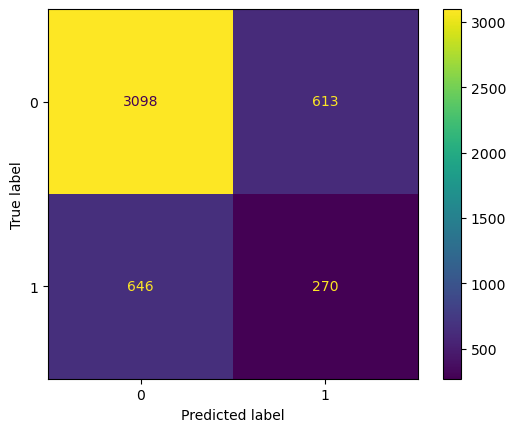

In [79]:
ConfusionMatrixDisplay(confusion_matrix(test_labeled_df ['label'], test_labeled_df ['predictions'])).plot()